The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df  =pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


 Here we seen that all columns having contineous Data

# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see there is no any null value present and data type of all columns are float or int 

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In the following columns there is maximum difference in between the max value and third quartor value 
1. Residual sugar
2.free sulfur dioxide
3.Total sulfur dioxide

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is any sigle null value so we can procced 

In [7]:
df.shape

(1599, 12)

In given dataset there is 1599 rows and 12 columns 

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

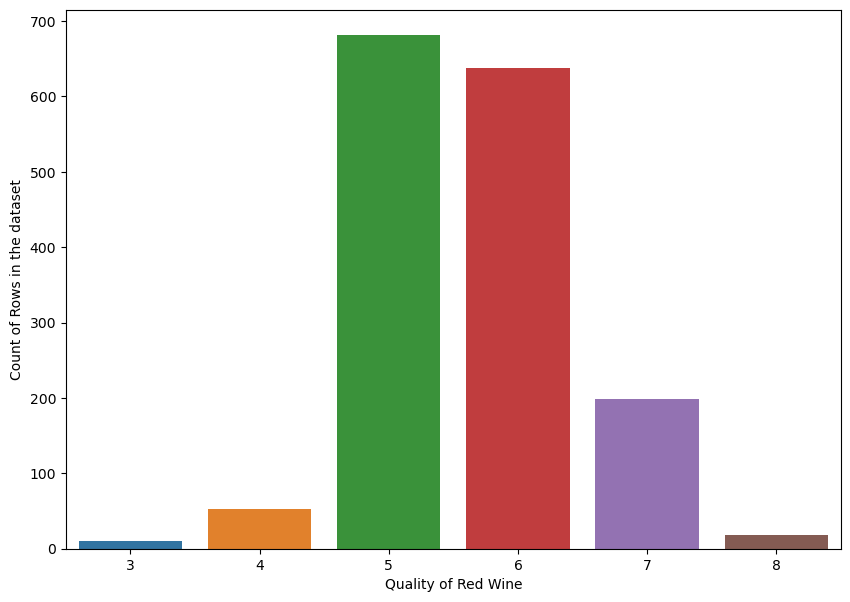

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()


It shown that there is very inbalance in dataset also, we can see that there large count for score 5 and 6 as comparew to other count

In [10]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

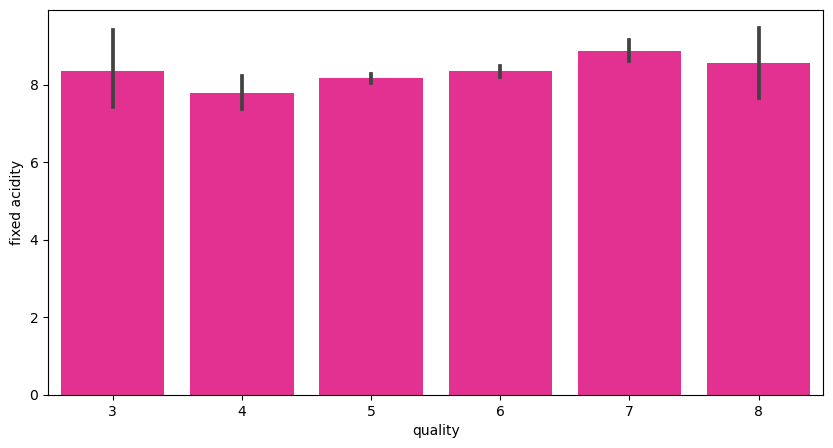

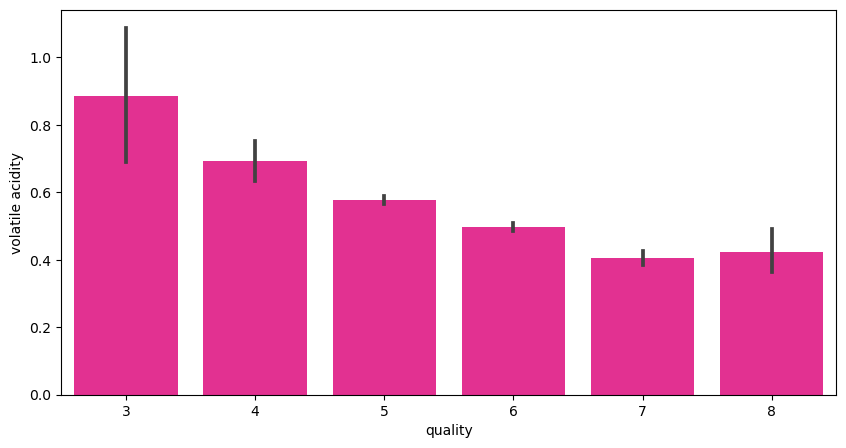

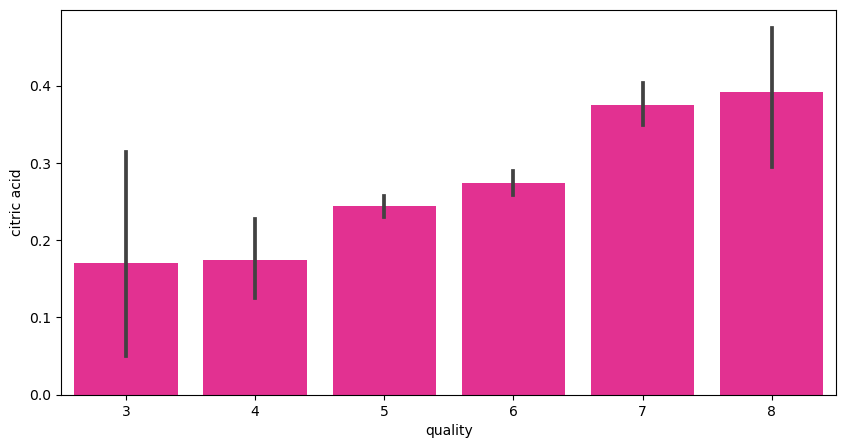

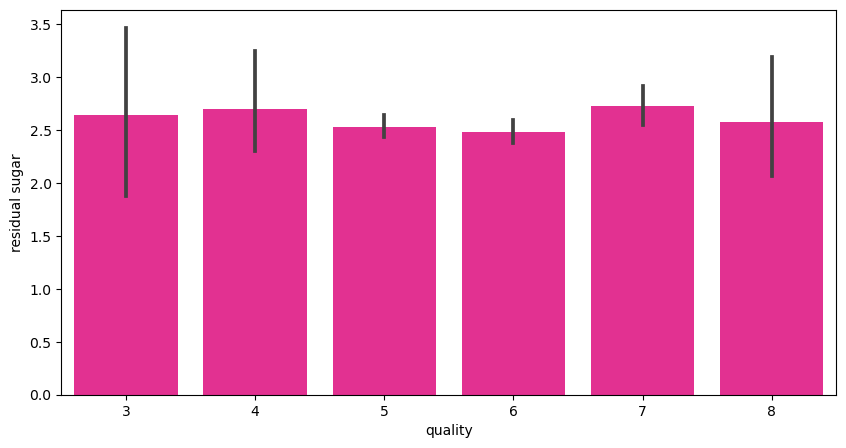

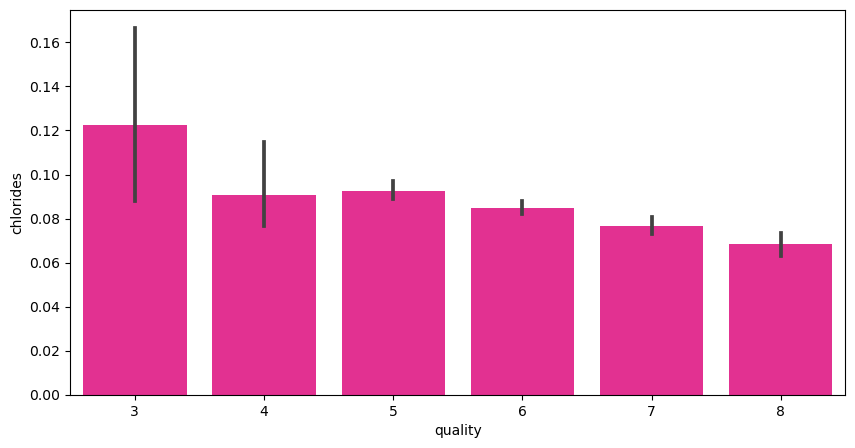

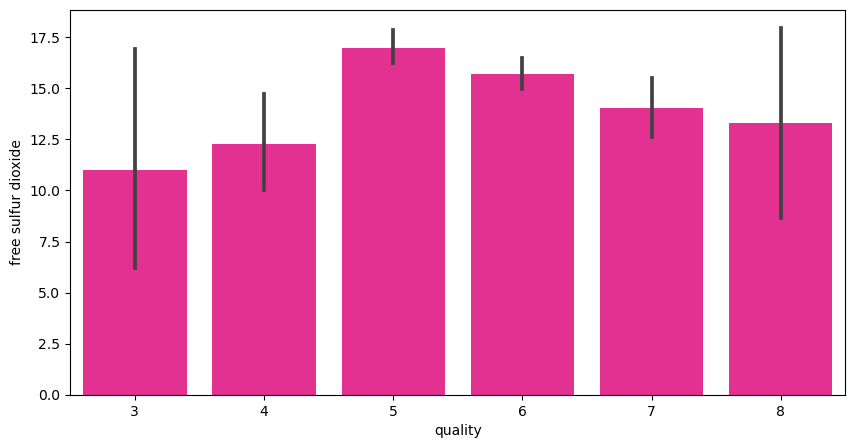

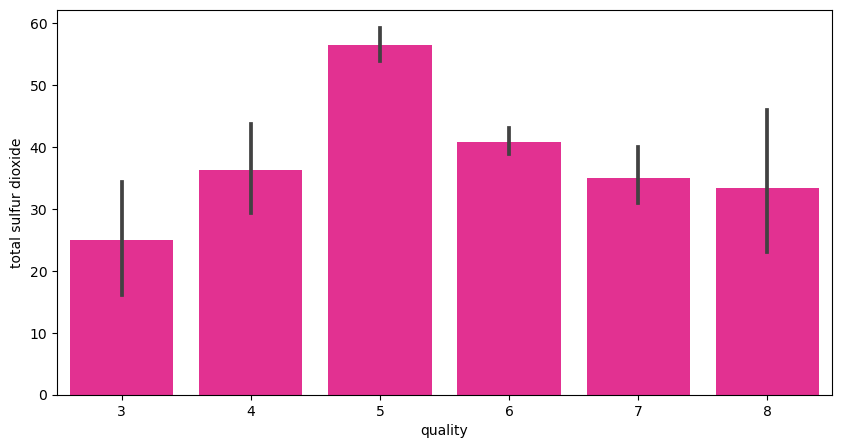

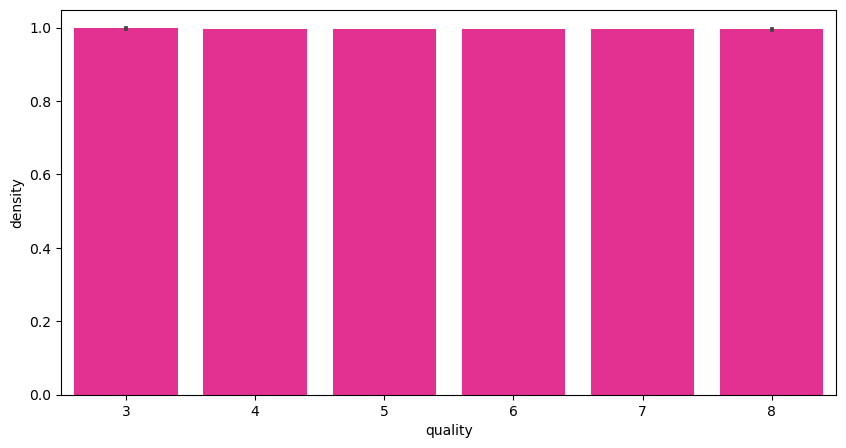

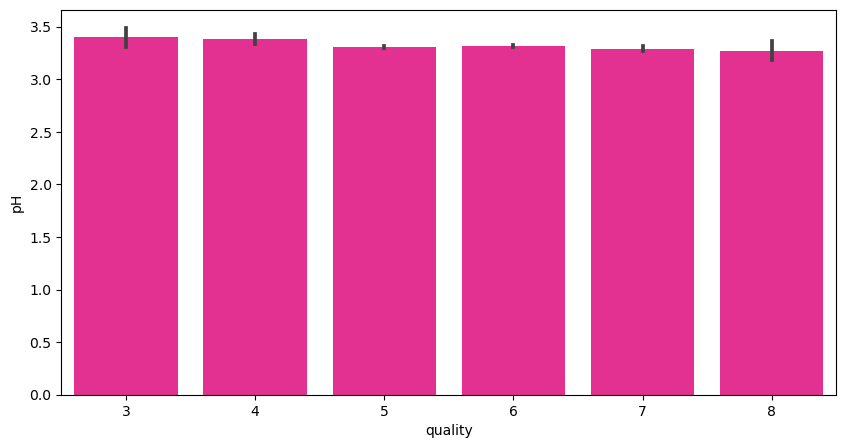

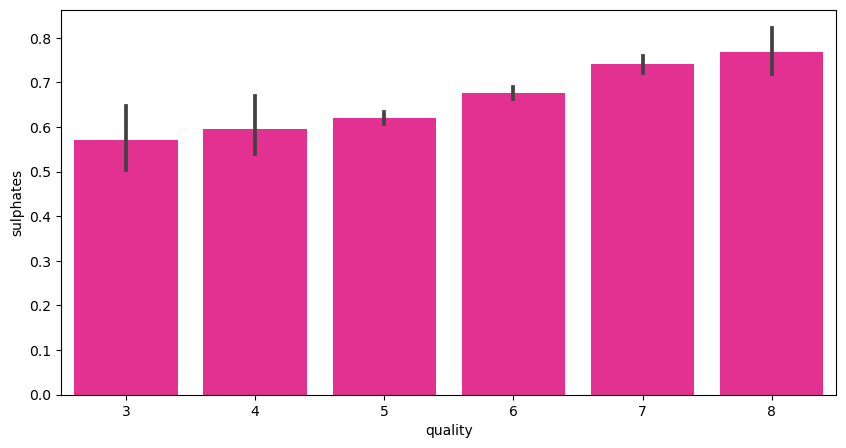

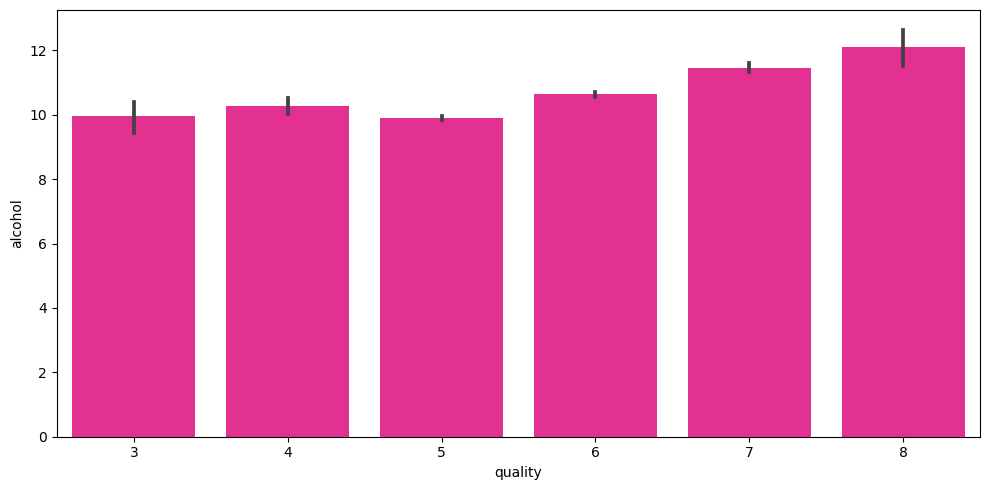

In [12]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="deeppink")
plt.tight_layout()
plt.show()


We seen that in fixed acidity there is no fixed deviation. in volatile acidity following the deacreasing trend. In citric acid there is increasing trend . in residual suger there is no any fixed deviation. in chlorides there is dreasing trend. in free sulfur dioxide ther is no fixed trend also in total sulfur dioxide in density there same same deviation for all quality score count so for that column there is balanced values same for pH. for sulphates and alcohol there is increasing trend

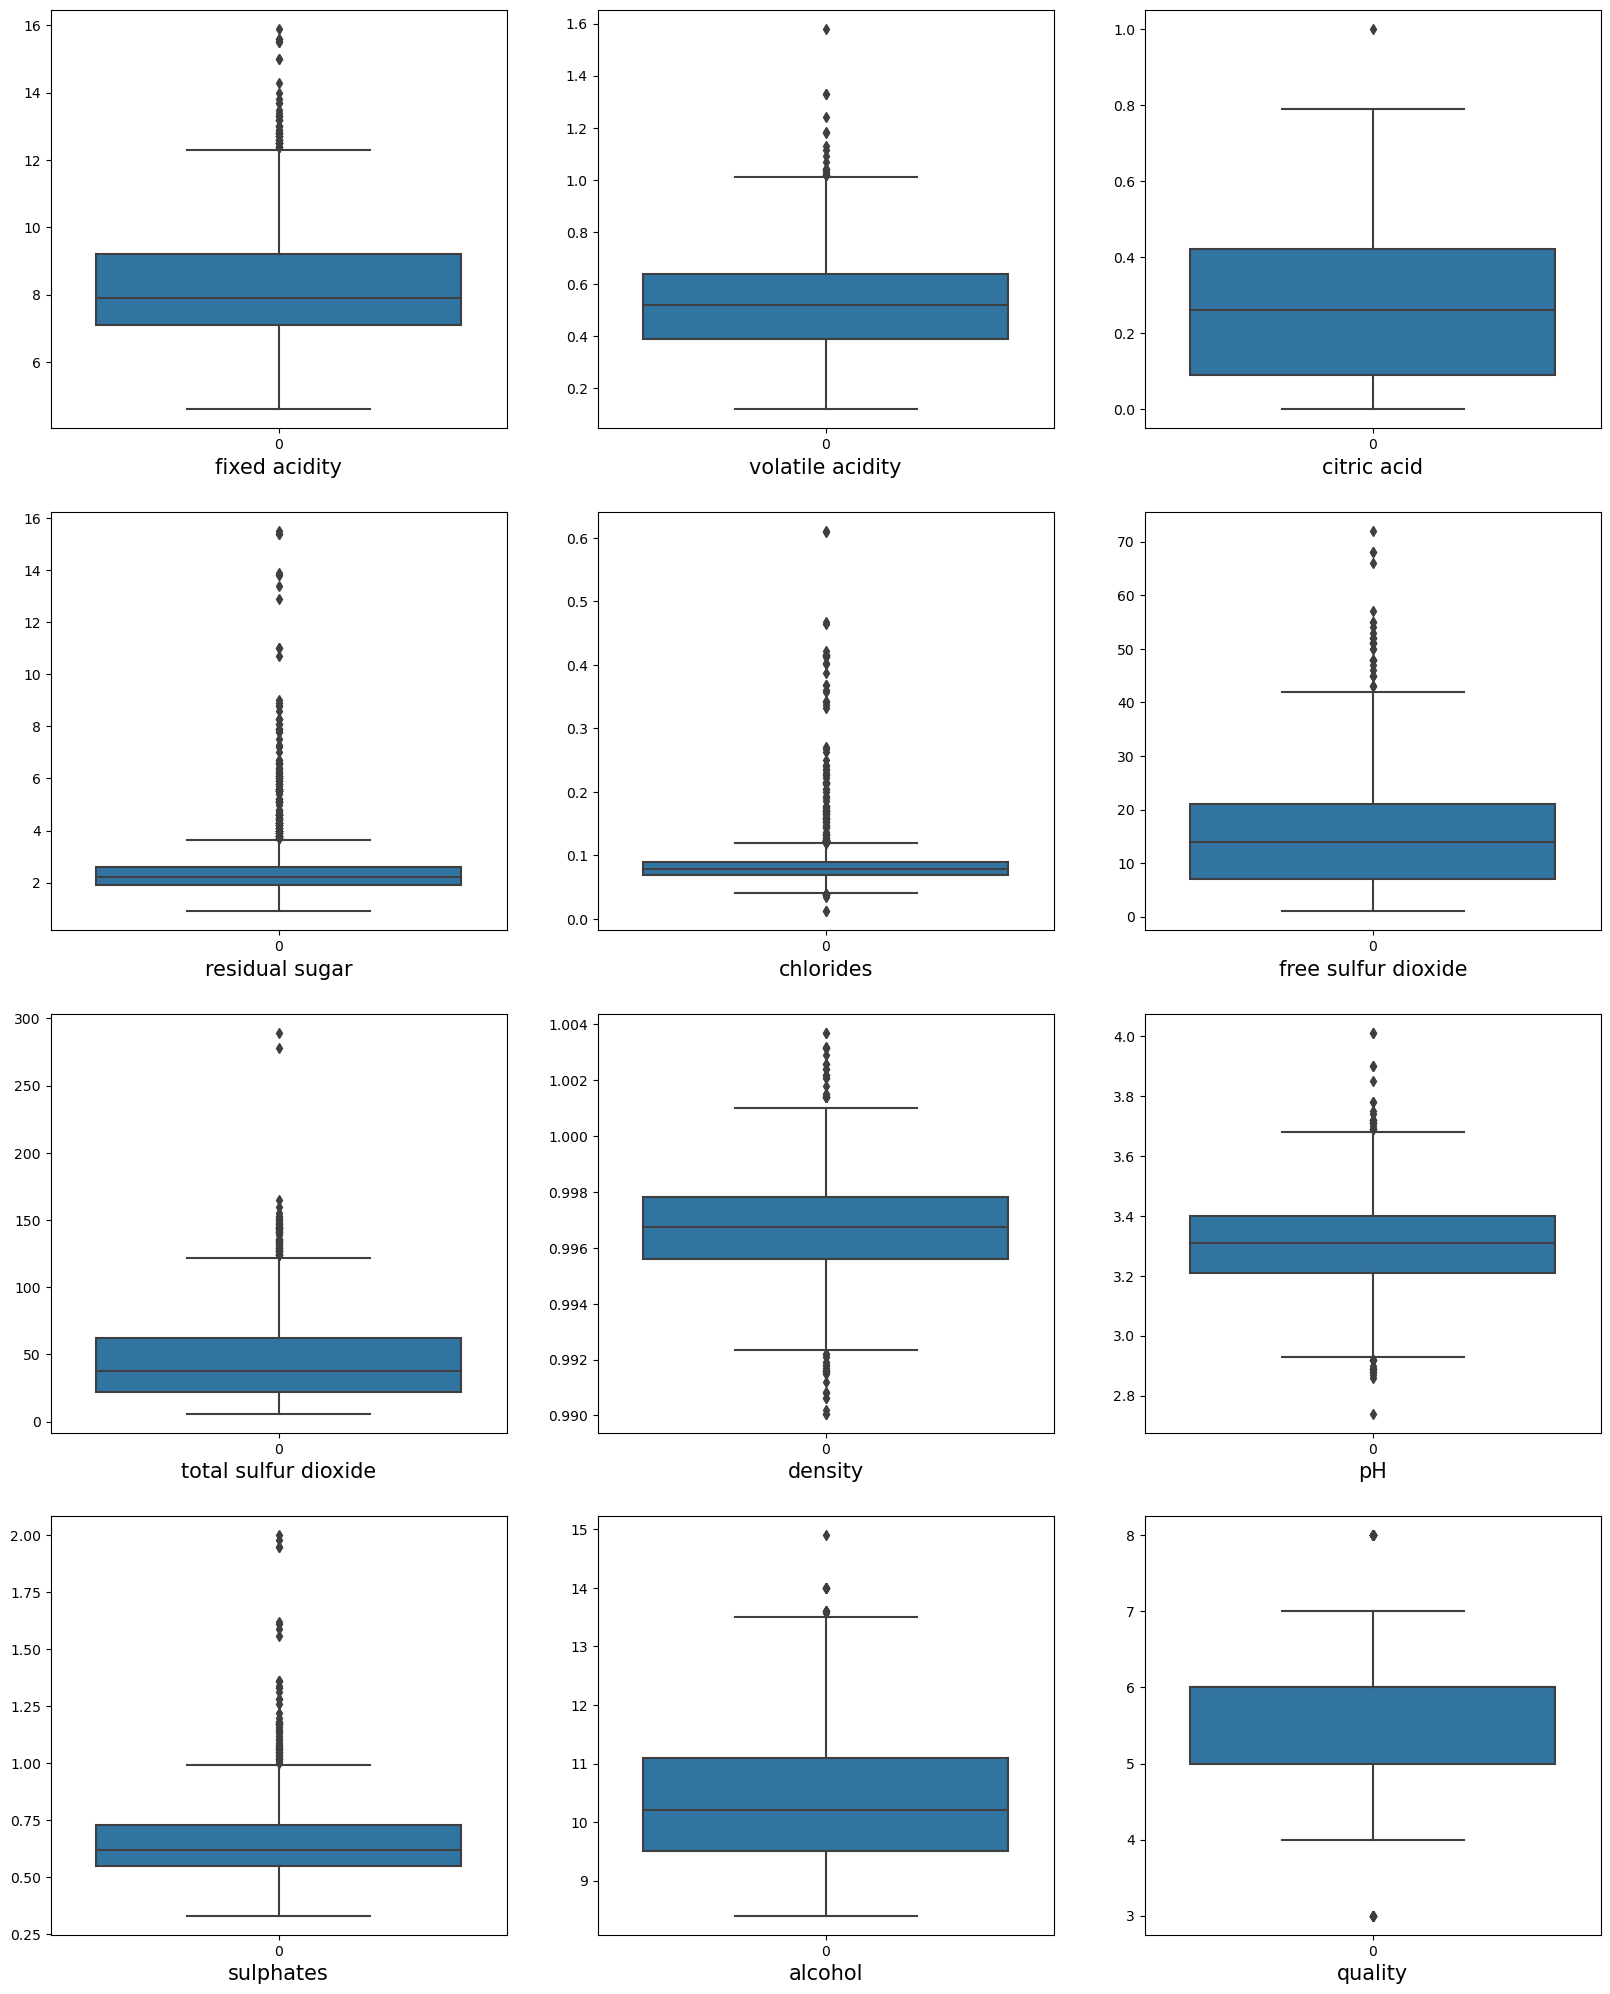

In [13]:
plt.figure(figsize =(20,25))
graph = 1

for column in df:
    if graph<=12: # As there are 9 column in the data
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data= df[column])
        plt.xlabel(column,fontsize =15)
    graph +=1
plt.show()   

We seen that there are contineous and sigle outlier in data

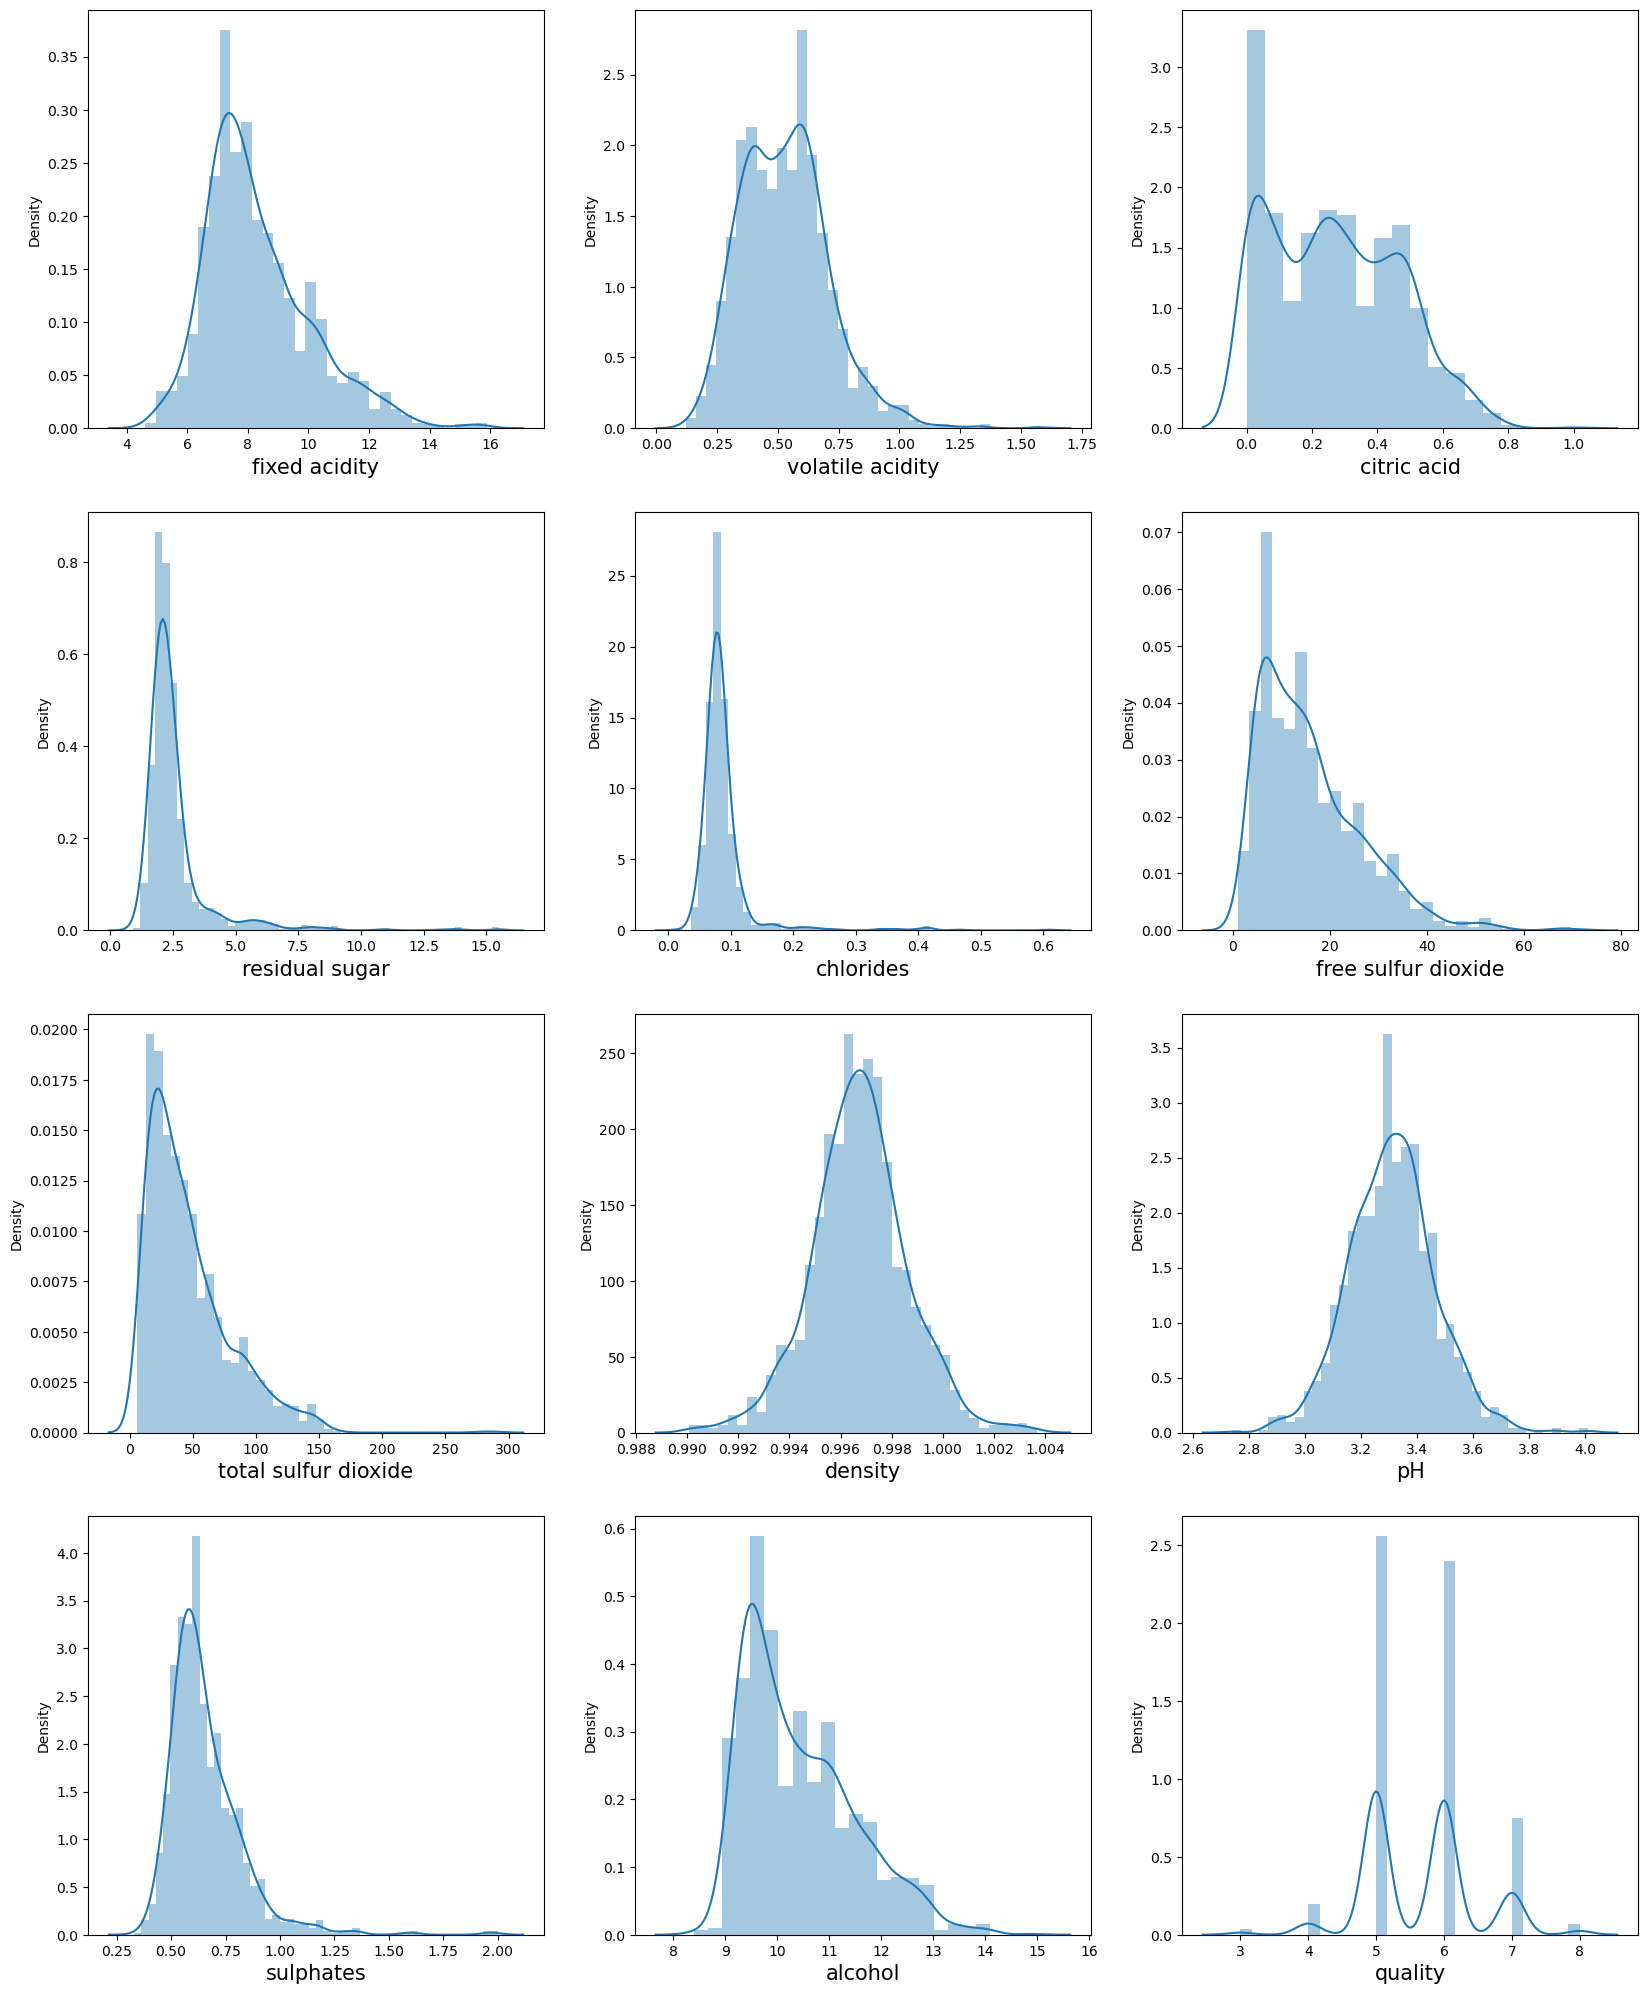

In [14]:
plt.figure(figsize =(20,25))
graph = 1

for column in df:
    if graph<=12: # As there are 9 column in the data
        plt.subplot(4,3,graph)
        ax=sns.distplot(df[column])
        plt.xlabel(column,fontsize =15)
    graph +=1
plt.show()   

We can see that density and pH having bell shape curve and others are having skewness to right and left also we have remove the skewness also in label column there is categorical data we have work on it

In [15]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

we see that there are more skewness in residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide and sulphapes so, we have to remove it 

In [16]:
df["residual sugar"] = np.cbrt(df["residual sugar"])
df["chlorides"] = np.cbrt(df["chlorides"])
df["free sulfur dioxide"] =np.cbrt(df["free sulfur dioxide"])
df["total sulfur dioxide"] =np.cbrt(df["total sulfur dioxide"])
df["sulphates"] = np.cbrt(df["sulphates"])

In [17]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Removing the Outliers 

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.552402,0.242092,0.323303,0.217554,0.558274,1.288643,0.601783,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.207150,0.455439,0.983836,0.813317,0.028261,0.719933,0.221852,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.099231,0.276540,0.129002,0.459903,0.134264,0.331177,0.025664,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.552402,0.276838,0.325192,0.629351,0.664277,0.979104,0.456840,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.552402,0.242092,0.323303,0.217554,0.558274,1.288643,0.601783,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.433557,0.215182,1.452110,0.147087,0.978765,0.899886,0.456840,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.207258,0.759603,1.856199,0.370437,0.862162,1.353436,0.718264,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.099231,0.242092,1.260746,0.008628,0.533554,0.705508,0.658180,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.433557,0.276838,1.452110,0.147087,0.676657,1.677400,0.412352,0.209308,0.787823


In [19]:
threshold =3
np.where(z>3)

(array([  13,   17,   17,   19,   33,   38,   42,   45,   81,   81,   83,
          86,   88,   91,   92,   95,  106,  106,  120,  126,  127,  142,
         144,  147,  151,  151,  151,  151,  163,  164,  169,  169,  181,
         199,  226,  226,  240,  243,  244,  258,  258,  274,  281,  291,
         308,  324,  325,  339,  347,  374,  381,  391,  396,  396,  400,
         400,  413,  442,  442,  451,  459,  467,  480,  480,  494,  517,
         544,  554,  554,  555,  555,  557,  557,  566,  567,  568,  588,
         595,  608,  614,  639,  649,  652,  652,  652,  666,  672,  690,
         690,  692,  695,  723,  724,  730,  754,  776,  777,  821,  832,
         836,  836,  837,  837,  889,  899,  911,  917,  923, 1017, 1018,
        1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1098, 1111,
        1114, 1165, 1186, 1235, 1244, 1244, 1260, 1269, 1269, 1270, 1270,
        1299, 1299, 1300, 1312, 1316, 1319, 1319, 1321, 1370, 1372, 1374,
        1374, 1434, 1434, 1434, 1435, 

In [20]:
len(np.where(z>3)[0])

163

In [21]:
df=df[(z<3).all(axis=1)]

In [22]:
from sklearn.feature_selection import SelectKBest,f_classif

In [23]:
x = df.drop('quality',axis=1)
y = df.quality

In [24]:
best_features = SelectKBest(score_func=f_classif,k=7)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(x.columns)

# Concate dataframes

feature_scores =pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns = ['Feature_Name','Score'] # Naming for columns

print(feature_scores.nlargest(7,'Score'))

            Feature_Name       Score
10               alcohol  143.951154
9              sulphates   62.355494
1       volatile acidity   56.272781
6   total sulfur dioxide   32.990241
2            citric acid   25.632832
7                density   13.251327
4              chlorides   11.637661


In [25]:
x_new= df[["alcohol","sulphates","volatile acidity","total sulfur dioxide","citric acid","density","chlorides"]]

In [26]:
x_new

,alcohol,sulphates,volatile acidity,total sulfur dioxide,citric acid,density,chlorides
0,9.4,0.824257,0.700,3.239612,0.00,0.99780,0.423582
1,9.8,0.879366,0.880,4.061548,0.00,0.99680,0.461044
2,9.8,0.866239,0.760,3.779763,0.04,0.99700,0.451436
3,9.8,0.833955,0.280,3.914868,0.56,0.99800,0.421716
4,9.4,0.824257,0.700,3.239612,0.00,0.99780,0.423582
...,...,...,...,...,...,...,...
1594,10.5,0.833955,0.600,3.530348,0.08,0.99490,0.448140
1595,11.2,0.912581,0.550,3.708430,0.10,0.99512,0.395789
1596,11.0,0.908560,0.510,3.419952,0.13,0.99574,0.423582
1597,10.2,0.892112,0.645,3.530348,0.12,0.99547,0.421716


In [27]:
x_new.describe()

,alcohol,sulphates,volatile acidity,total sulfur dioxide,citric acid,density,chlorides
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,10.417978,0.860151,0.524108,3.385542,0.264844,0.996711,0.430467
std,1.018872,0.057902,0.169655,0.776300,0.190445,0.001728,0.032926
min,8.500000,0.691042,0.120000,1.817121,0.000000,0.991200,0.336198
25%,9.500000,0.819321,0.390000,2.802039,0.090000,0.995600,0.412129
50%,10.200000,0.852702,0.520000,3.332222,0.250000,0.996700,0.429084
75%,11.100000,0.896281,0.633750,3.914868,0.420000,0.997800,0.446475
max,13.600000,1.062659,1.040000,5.484807,0.790000,1.002200,0.597209


In [28]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y =SM.fit_resample(x,y)
y.value_counts()

5    636
6    636
7    636
4    636
8    636
Name: quality, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [30]:
scalar =StandardScaler()
x_scaler = scalar.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.25,random_state = 355)

In [32]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30,random_state=200)
RFR =RandomForestClassifier()
RFR.fit(x_train,y_train)
pred = RFR.predict(x_test)
acc =accuracy_score(y_test,pred)

In [33]:
acc

0.8249475890985325

In [34]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier ,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [35]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30,random_state=200)
LR =LogisticRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
acc =accuracy_score(y_test,pred)

In [36]:
acc

0.48427672955974843

In [37]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30,random_state=200)
svc =SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
acc =accuracy_score(y_test,pred)

In [38]:
acc

0.45178197064989517

In [39]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30,random_state=200)
GB =GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred = GB.predict(x_test)
acc =accuracy_score(y_test,pred)

In [40]:
acc

0.7872117400419287

In [41]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30,random_state=200)
AC =AdaBoostClassifier()
AC.fit(x_train,y_train)
pred = AC.predict(x_test)
acc =accuracy_score(y_test,pred)

In [42]:
acc

0.4171907756813417

In [43]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30,random_state=200)
BC =BaggingClassifier()
BC.fit(x_train,y_train)
pred = BC.predict(x_test)
acc =accuracy_score(y_test,pred)

In [44]:
acc

0.790356394129979

We Have Seen That the Random Forest Classifier is best fit  model for that problem Is Almost 84.69%